In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Line Search Methods

In [2]:
from yase.optimization import Quadratic, Rosenbrock
from yase.optimization.utils import plot_trajectory_optimization
from yase.optimization.unconstrained.line_search import *

quad = Quadratic(Q=[[5, -3], 
                    [-3, 5]], q=[10, 5])
rosen = Rosenbrock()

## Less than Gradient or 0th Order Methods

### Subgradient

iter	cost		gnorm		gap		rate		astar
   0	3.0000e+00	1.3153e+01	3.1906e+01			1.2317e-01
  50	-2.6442e+01	3.1400e+00	2.4644e+00	7.7239e-02	3.9698e-02
 100	-2.8714e+01	8.7692e-01	1.9225e-01	7.8011e-02	1.0937e-02
 150	-2.8889e+01	2.6337e-01	1.7341e-02	9.0201e-02	2.8021e-03
 200	-2.8902e+01	1.2389e-01	3.8373e-03	2.2128e-01	4.5835e-04
 250	-2.8904e+01	9.4222e-02	2.2194e-03	5.7839e-01	3.0677e-04
 300	-2.8905e+01	5.5918e-02	7.8170e-04	3.5221e-01	5.1693e-04
 350	-2.8898e+01	3.6679e-01	8.4212e-03	1.0773e+01	2.3038e-02
 400	-2.8904e+01	1.9628e-01	2.4080e-03	2.8594e-01	1.2415e-02
 450	-2.8905e+01	1.2157e-01	9.2372e-04	3.8361e-01	7.8359e-03
 500	-2.8906e+01	1.4725e-02	1.9055e-05	2.0629e-02	3.2570e-03
 550	-2.8906e+01	2.4325e-03	3.6984e-07	1.9409e-02	1.2034e-02
 600	-2.8906e+01	2.2974e-03	3.2988e-07	8.9194e-01	1.2724e-02
 650	-2.8906e+01	5.3031e-03	1.7577e-06	5.3284e+00	5.7816e-03
 700	-2.8906e+01	2.8183e-02	4.9644e-05	2.8244e+01	2.7870e-03
 750	-2.8906e+01	5.2693e-03	1.7354e-06	3.4956e-02	5.8144e-03

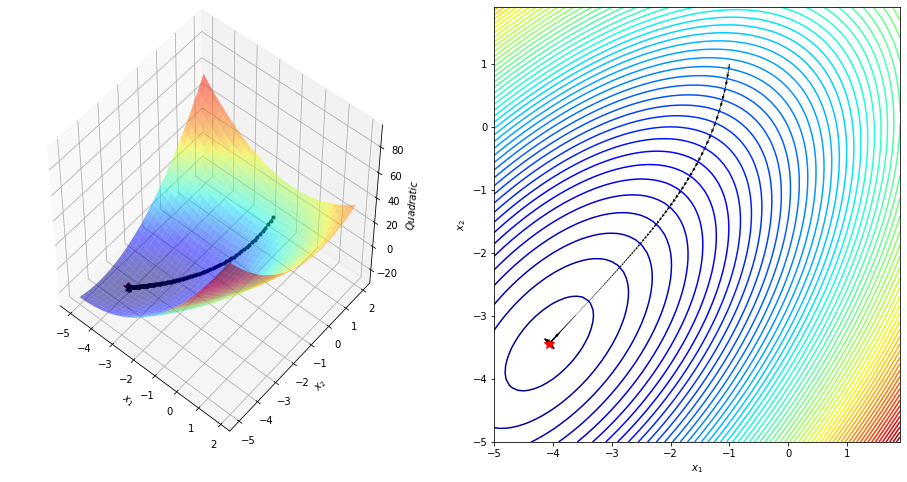

In [3]:
opt = Subgradient(f=quad, x=[-1, 1], a_start=0.54, verbose=50)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	cost		gnorm		gap		rate		astar
   0	4.0000e+00	4.0000e+00	4.0000e+00			5.2000e-02
  50	2.6931e-01	7.4982e-01	2.6931e-01	6.7328e-02	2.0885e-02
 100	3.2878e-03	3.4529e-01	3.2878e-03	1.2208e-02	1.2781e-02
 150	3.0216e-03	3.5743e-01	3.0216e-03	9.1904e-01	8.7064e-03
 200	2.4962e-05	3.2827e-02	2.4962e-05	8.2613e-03	9.7700e-04
 250	1.8105e-06	8.8525e-03	1.8105e-06	7.2531e-02	3.1739e-04
 300	2.4768e-07	3.2728e-03	2.4768e-07	1.3680e-01	3.8107e-04
 350	3.1794e-07	3.7082e-03	3.1794e-07	1.2837e+00	3.5527e-04
 400	1.4893e-05	2.5362e-02	1.4893e-05	4.6842e+01	6.2662e-04
 450	4.5642e-07	4.4441e-03	4.5642e-07	3.0647e-02	3.2760e-04
 500	1.0542e-06	6.7540e-03	1.0542e-06	2.3096e+00	3.0414e-04
 550	8.7494e-07	6.1458e-03	8.7494e-07	8.2999e-01	3.0508e-04
 600	1.0175e-05	2.0920e-02	1.0175e-05	1.1630e+01	5.3419e-04
 650	5.1548e-07	4.7230e-03	5.1548e-07	5.0661e-02	3.2087e-04
 700	7.2068e-05	5.5933e-02	7.2068e-05	1.3981e+02	1.3063e-03
 750	4.6673e-07	2.8979e-03	4.6673e-07	6.4762e-03	5.0614e-04
 800	1.6315e-0

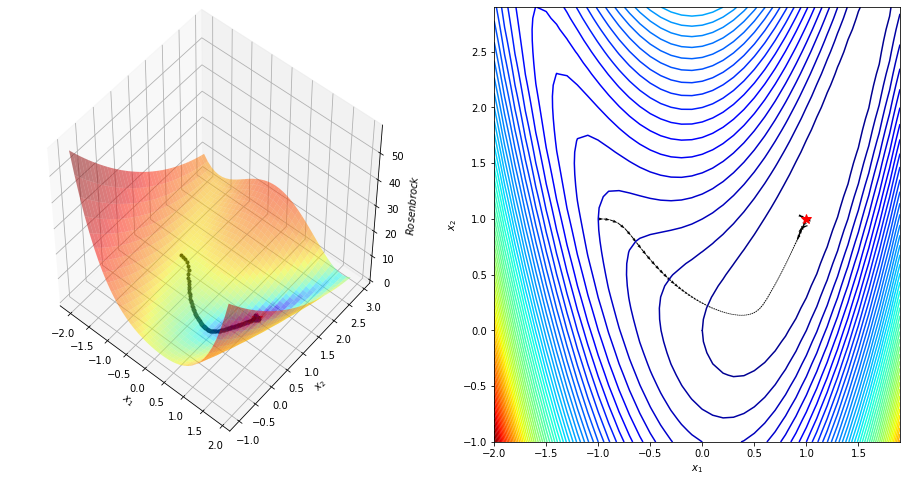

In [4]:
opt = Subgradient(f=rosen, x=[-1, 1], a_start=0.052, verbose=50)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

## Gradient or 1st Order Methods

### Steepest Gradient Descent for Quadratic functions

iter	cost		gnorm		gap		rate
   0	3.0000e+00	1.3153e+01	3.1906e+01		
   5	-2.8764e+01	1.0521e+00	1.4176e-01	4.4432e-03
  10	-2.8906e+01	5.8441e-02	6.2988e-04	4.4432e-03
  15	-2.8906e+01	4.6747e-03	2.7987e-06	4.4432e-03
  20	-2.8906e+01	2.5966e-04	1.2435e-08	4.4432e-03
  25	-2.8906e+01	2.0770e-05	5.5248e-11	4.4430e-03
  30	-2.8906e+01	1.1537e-06	2.4158e-13	4.3727e-03



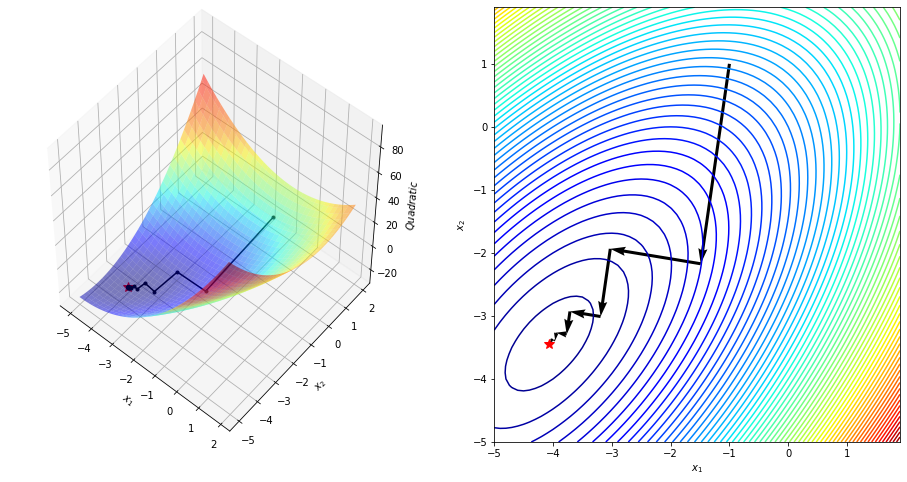

In [5]:
opt = QuadraticSteepestGradientDescent(f=quad, x=[-1, 1], verbose=5)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

### Steepest Gradient Descent

iter	feval	cost		gnorm		gap		rate		ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01			 1	 1	2.4401e-01
   5	  11	-2.8764e+01	1.0521e+00	1.4176e-01	4.4432e-03	 1	 1	1.6944e-01
  10	  21	-2.8906e+01	5.8441e-02	6.2988e-04	4.4432e-03	 1	 1	2.4401e-01
  15	  31	-2.8906e+01	4.6747e-03	2.7987e-06	4.4432e-03	 1	 1	1.6944e-01
  20	  41	-2.8906e+01	2.5966e-04	1.2435e-08	4.4432e-03	 1	 1	2.4401e-01
  25	  51	-2.8906e+01	2.0770e-05	5.5245e-11	4.4427e-03	 1	 1	1.6944e-01
  30	  61	-2.8906e+01	1.1537e-06	2.4158e-13	4.3730e-03	 1	 1	2.4401e-01



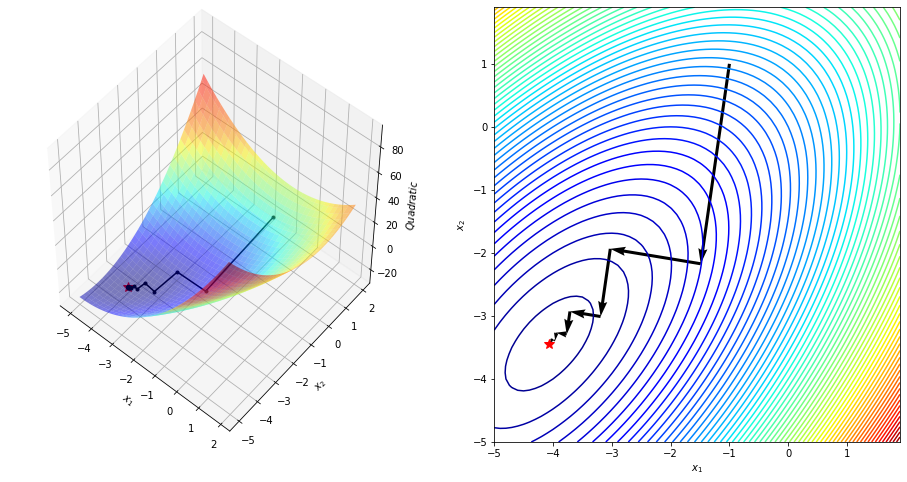

In [6]:
opt = SteepestGradientDescent(f=quad, x=[-1, 1], verbose=5)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00			 1	 1	2.0000e-02
  10	  24	1.4069e-01	7.8869e-01	1.4069e-01	3.5172e-02	 1	 1	1.3544e-01
  20	  43	9.6148e-03	3.6070e-01	9.6148e-03	6.8342e-02	 1	 1	7.2205e-02
  30	  60	1.9204e-04	2.4352e-02	1.9204e-04	1.9973e-02	 1	 1	6.1560e-02
  40	  80	8.0739e-05	1.3164e-02	8.0739e-05	4.2044e-01	 1	 1	7.0312e-02
  50	 100	3.8126e-05	8.2978e-03	3.8126e-05	4.7222e-01	 1	 1	7.7335e-02
  60	 120	1.8733e-05	5.5144e-03	1.8733e-05	4.9135e-01	 1	 1	8.3326e-02
  70	 140	9.3507e-06	3.7591e-03	9.3507e-06	4.9915e-01	 1	 1	8.8386e-02
  80	 160	4.6935e-06	2.5980e-03	4.6935e-06	5.0194e-01	 1	 1	9.2548e-02
  90	 180	2.3582e-06	1.8097e-03	2.3582e-06	5.0244e-01	 1	 1	9.5870e-02
 100	 200	1.1837e-06	1.2665e-03	1.1837e-06	5.0197e-01	 1	 1	9.8450e-02
 110	 220	5.9328e-07	8.8879e-04	5.9328e-07	5.0119e-01	 1	 1	1.0041e-01
 120	 240	2.9687e-07	6.2484e-04	2.9687e-07	5.0039e-01	 1	 1	1.0186e-01
 130	 260	1.4834e-07	4.3976e-04	1.4834e

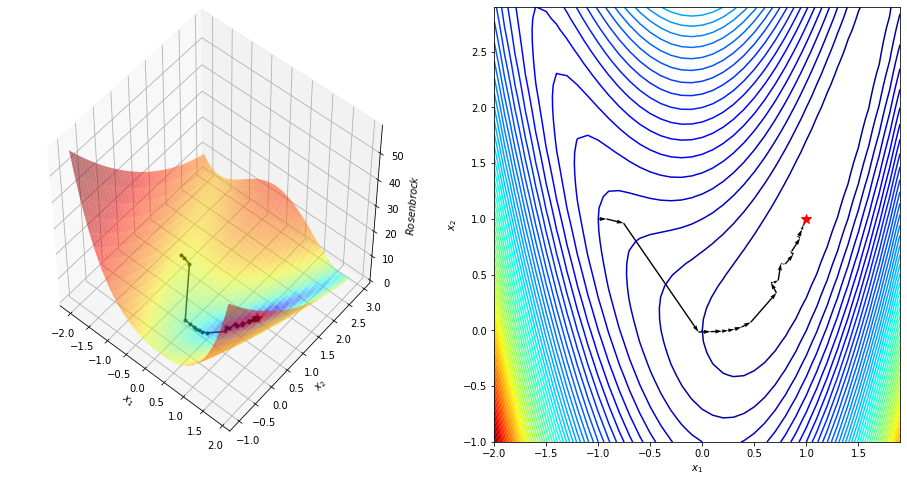

In [7]:
opt = SteepestGradientDescent(f=rosen, x=[-1, 1], verbose=10)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

### Conjugate Gradient for Quadratic functions

iter	cost		gnorm		gap		rate		beta
   0	3.0000e+00	1.3153e+01	3.1906e+01				
   5	-2.8687e+01	1.7881e+00	2.1922e-01	6.8709e-03	0.4874
  10	-2.8882e+01	3.3000e-01	2.3890e-02	1.0898e-01	0.4874
  15	-2.8906e+01	5.5423e-02	2.9783e-04	1.2466e-02	0.4874
  20	-2.8906e+01	8.0433e-03	1.5915e-05	5.3438e-02	0.4874
  25	-2.8906e+01	1.6654e-03	3.6646e-07	2.3026e-02	0.4874
  30	-2.8906e+01	1.9677e-04	9.3977e-09	2.5644e-02	0.4874
  35	-2.8906e+01	4.8006e-05	3.8388e-10	4.0849e-02	0.4874
  40	-2.8906e+01	5.1228e-06	4.9347e-12	1.2855e-02	0.4874
  45	-2.8906e+01	1.3239e-06	3.3751e-13	6.8395e-02	0.4874



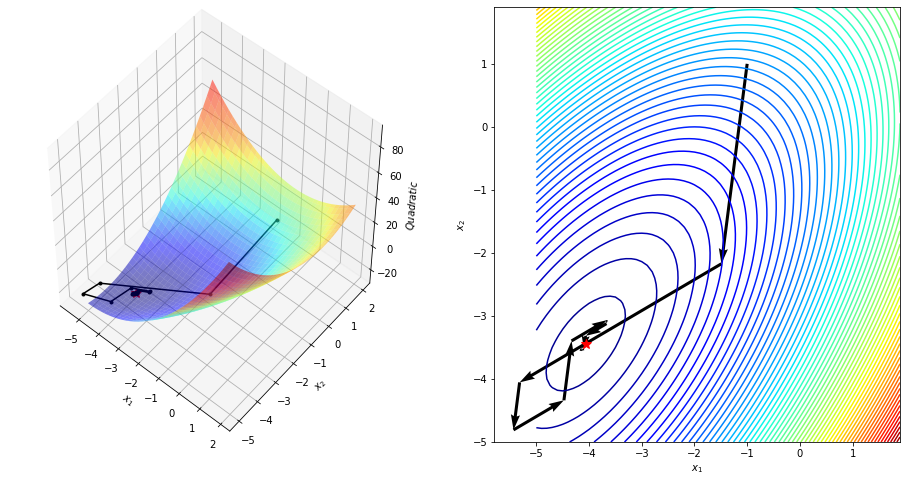

In [8]:
opt = QuadraticConjugateGradient(f=quad, x=[-1, 1], verbose=5)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

### Nonlinear Conjugate Gradient

#### Fletcher-Reeves formula

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01				 1	 1	2.44e-01
   1	   3	-1.8106e+01	9.1829e+00	1.0800e+01	3.3848e-01	0.4874	 1	 1	2.56e-01
   2	   5	-2.8906e+01	0.0000e+00	-1.0658e-14	-9.8689e-16



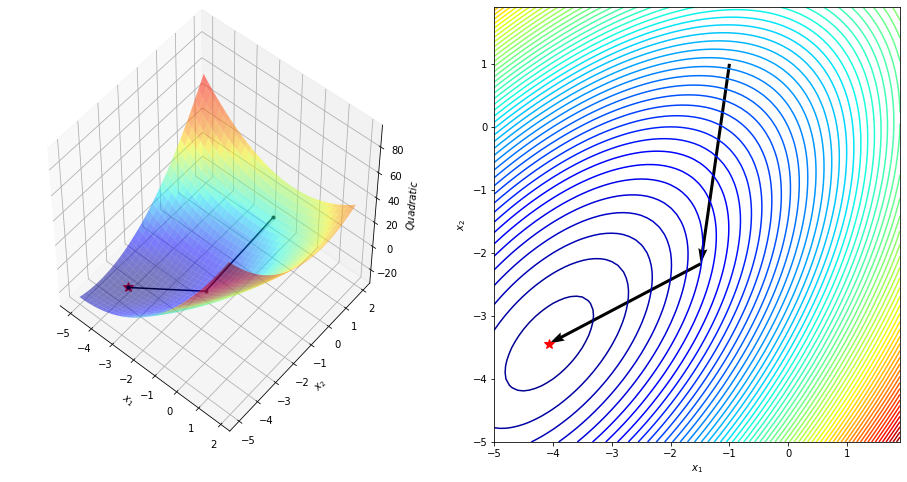

In [9]:
opt = NonlinearConjugateGradient(f=quad, x=[-1, 1], wf=0, verbose=True)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00				 1	 1	2.00e-02
   5	  31	2.8968e-01	1.3019e+00	2.8968e-01	7.2419e-02	0.4487	 1	 1	1.00e-02
  10	  41	1.8175e-01	5.2523e-01	1.8175e-01	6.2743e-01	0.9868	 1	 1	1.00e-02
  15	  51	1.2203e-01	1.1813e+00	1.2203e-01	6.7141e-01	1.5196	 1	 1	1.00e-02
  20	  64	7.5572e-02	1.9254e+00	7.5572e-02	6.1929e-01	0.9294	 1	 2	4.35e-03
  25	  79	5.9316e-02	4.2915e-01	5.9316e-02	7.8489e-01	0.4666	 1	 2	3.99e-03
  30	  94	5.8465e-02	1.9939e-01	5.8465e-02	9.8567e-01	1.2659	 1	 2	7.28e-03
  35	 107	5.3899e-02	1.0796e+00	5.3899e-02	9.2190e-01	1.9714	 1	 1	1.00e-02
  40	 118	2.1515e-02	2.9726e-01	2.1515e-02	3.9916e-01	0.2912	 1	 2	2.14e-03
  45	 130	2.1276e-02	1.5298e-01	2.1276e-02	9.8892e-01	1.1941	 1	 1	1.00e-02
  50	 140	1.8173e-02	4.3556e-01	1.8173e-02	8.5414e-01	1.3442	 1	 1	1.00e-02
  55	 150	1.1101e-04	1.6510e-02	1.1101e-04	6.1087e-03	0.9154	 1	 1	5.12e-01
  60	 160	7.2808e-07	3.9482e-03	7.2808e-07	6.5585e-

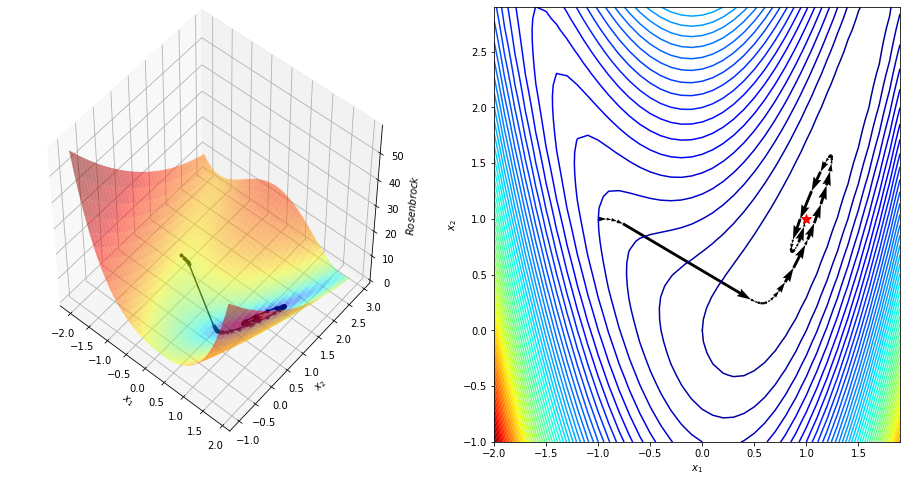

In [10]:
opt = NonlinearConjugateGradient(f=rosen, x=[-1, 1], wf=0, verbose=5)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

#### Polak-Ribière formula

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01				 1	 1	2.44e-01
   1	   3	-1.8106e+01	9.1829e+00	1.0800e+01	3.3848e-01	0.4874	 1	 1	2.56e-01
   2	   5	-2.8906e+01	0.0000e+00	-3.5527e-15	-3.2896e-16



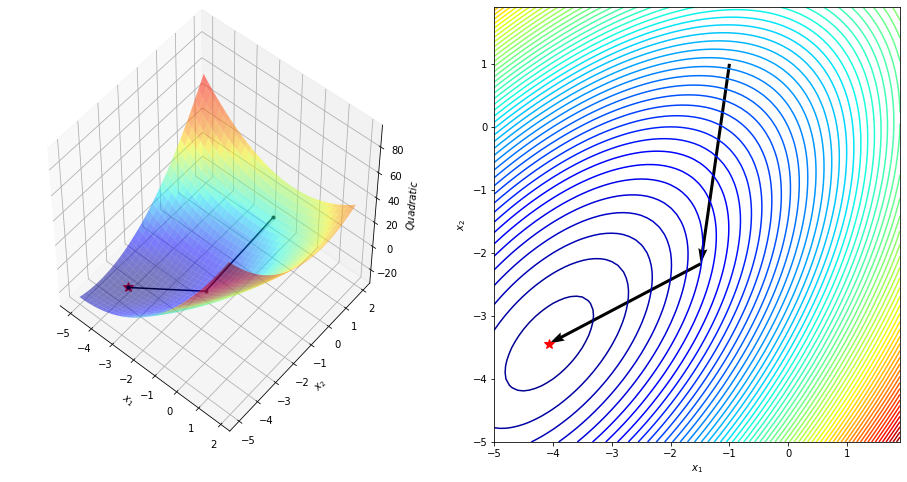

In [11]:
opt = NonlinearConjugateGradient(f=quad, x=[-1, 1], wf=1, verbose=True)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00				 1	 1	2.00e-02
   5	  15	7.0010e-01	1.6060e+00	7.0010e-01	1.7503e-01	0.0000	 1	 1	3.85e-02
  10	  25	1.4829e-01	7.7794e-01	1.4829e-01	2.1181e-01	0.6235	 1	 1	1.57e-01
  15	  34	1.3598e-03	9.1988e-02	1.3598e-03	9.1701e-03	1.5234	 1	 1	6.76e-02
  20	  42	3.0511e-06	3.0443e-03	3.0511e-06	2.2438e-03	2.8986	 1	 0	1.00e+00



/home/donato/donato.meoli.95@gmail.com/MachineLearning&ComputationalMathematics/yase/yase/optimization/unconstrained/line_search/line_search.py:213: RuntimeWarning: divide by zero encountered in double_scalars
  a = (am * phi_ps - _as * phi_pm) / (phi_ps - phi_pm)


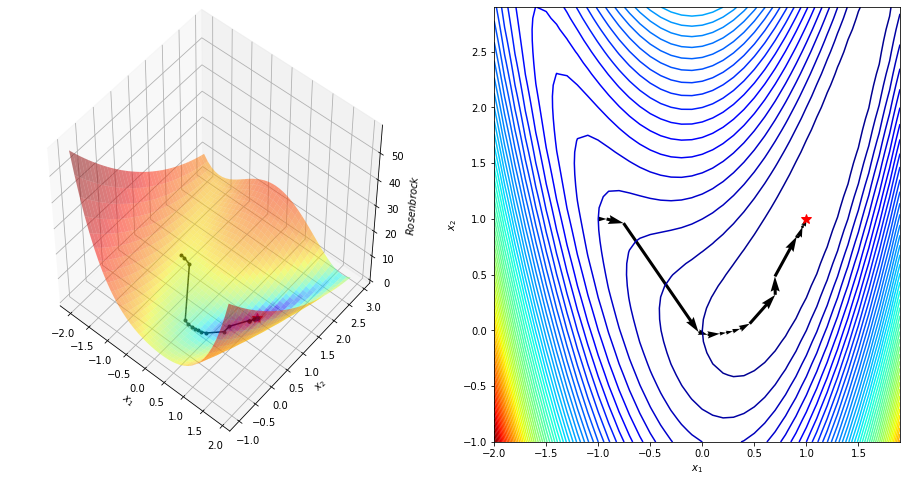

In [12]:
opt = NonlinearConjugateGradient(f=rosen, x=[-1, 1], wf=1, verbose=5)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

#### Hestenes-Stiefel formula

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01				 1	 1	2.44e-01
   1	   3	-1.8106e+01	9.1829e+00	1.0800e+01	3.3848e-01	0.4874	 1	 1	2.56e-01
   2	   5	-2.8906e+01	0.0000e+00	-3.5527e-15	-3.2896e-16



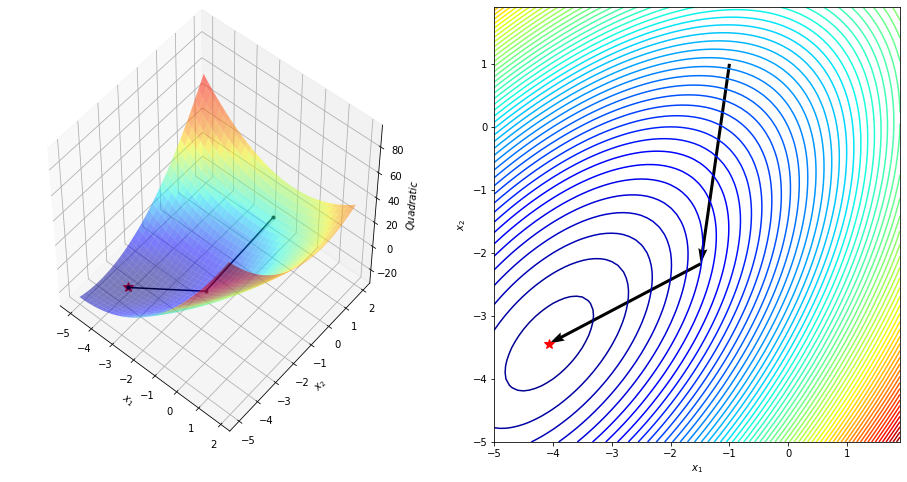

In [13]:
opt = NonlinearConjugateGradient(f=quad, x=[-1, 1], wf=2, verbose=True)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00				 1	 1	2.00e-02
   5	  10	1.4668e+00	2.3990e+00	1.4668e+00	3.6669e-01	-0.7788	 1	 0	1.00e+00
  10	  17	7.7104e-01	1.6627e+00	7.7104e-01	5.2568e-01	(res)	 1	 1	4.74e-02
  15	  25	3.8825e-01	1.2009e+00	3.8825e-01	5.0355e-01	-0.8021	 1	 0	1.00e+00
  20	  32	8.3886e-02	5.8252e-01	8.3886e-02	2.1606e-01	(res)	 1	 1	4.39e-02
  25	  39	2.3670e-03	4.7555e-02	2.3670e-03	2.8217e-02	-0.4053	 1	 1	1.12e-01
  30	  47	9.9184e-05	1.0755e-02	9.9184e-05	4.1902e-02	(res)	 1	 1	1.16e-01
  35	  55	1.0606e-07	7.0524e-04	1.0606e-07	1.0693e-03	4.7640	 1	 1	4.27e-01



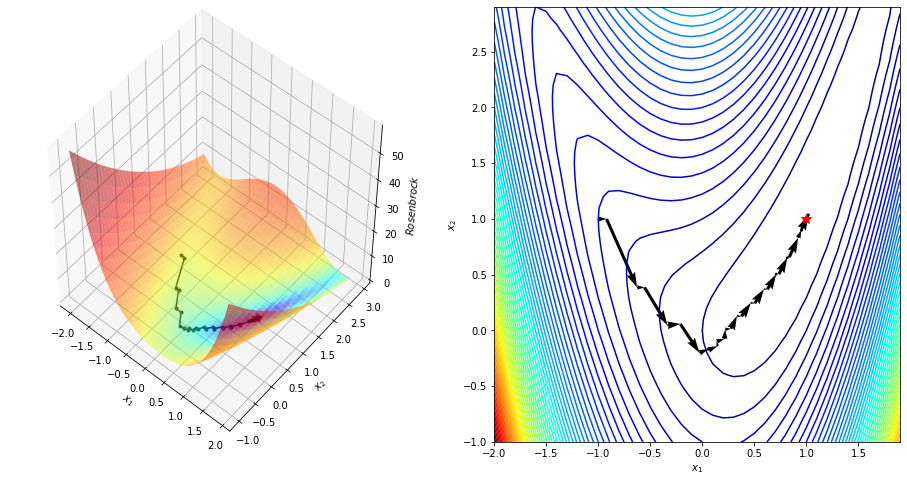

In [14]:
opt = NonlinearConjugateGradient(f=rosen, x=[-1, 1], wf=2, r_start=1, verbose=5)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

#### Dai-Yuan formula

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01				 1	 1	2.44e-01
   1	   3	-1.8106e+01	9.1829e+00	1.0800e+01	3.3848e-01	0.4874	 1	 1	2.56e-01
   2	   5	-2.8906e+01	0.0000e+00	-1.0658e-14	-9.8689e-16



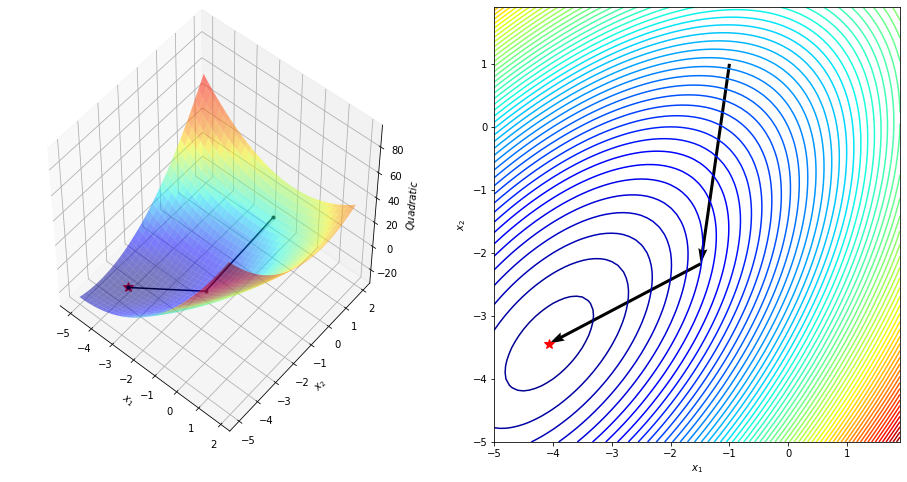

In [15]:
opt = NonlinearConjugateGradient(f=quad, x=[-1, 1], wf=3, verbose=True)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		beta	ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00				 1	 1	2.00e-02
   5	  19	2.3544e-01	1.2992e+00	2.3544e-01	5.8860e-02	0.4808	 1	 1	1.00e-02
  10	  29	1.3264e-01	4.9573e-01	1.3264e-01	5.6338e-01	1.2434	 1	 1	1.00e-02
  15	  39	6.0939e-02	9.7472e-01	6.0939e-02	4.5942e-01	1.0711	 1	 1	1.00e-02
  20	  50	2.1500e-04	1.7105e-02	2.1500e-04	3.5281e-03	0.7603	 1	 0	1.00e+00
  25	  59	1.3251e-06	4.6609e-03	1.3251e-06	6.1631e-03	0.7477	 1	 1	8.63e-02
  30	  69	1.7606e-08	3.5980e-04	1.7606e-08	1.3287e-02	0.1117	 1	 1	8.18e-02
  35	  79	5.3574e-10	3.4359e-05	5.3574e-10	3.0430e-02	0.1527	 1	 1	1.56e-01
  40	  89	1.9545e-11	7.1718e-06	1.9545e-11	3.6482e-02	0.8773	 1	 1	3.51e-01
  45	  99	5.2424e-13	2.2648e-06	5.2424e-13	2.6822e-02	2.6276	 1	 1	1.61e-01



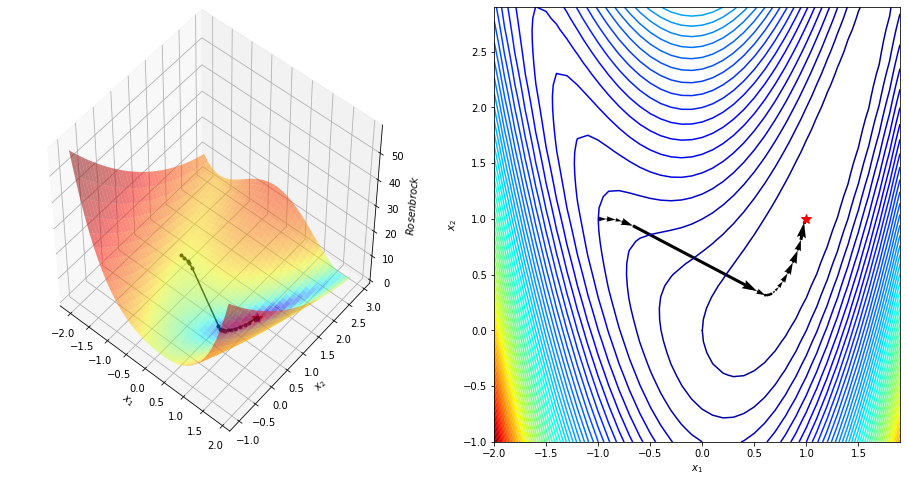

In [16]:
opt = NonlinearConjugateGradient(f=rosen, x=[-1, 1], wf=3, verbose=5)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

### Heavy Ball Gradient

iter	feval	cost		gnorm		gap		rate		ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01			 1	 1	2.44e-01
   5	  11	-2.8906e+01	5.4588e-02	7.2510e-04	2.2726e-05	 1	 1	1.24e-01
  10	  22	-2.8906e+01	1.2902e-04	1.3558e-09	1.8698e-06	 1	 1	1.36e-01



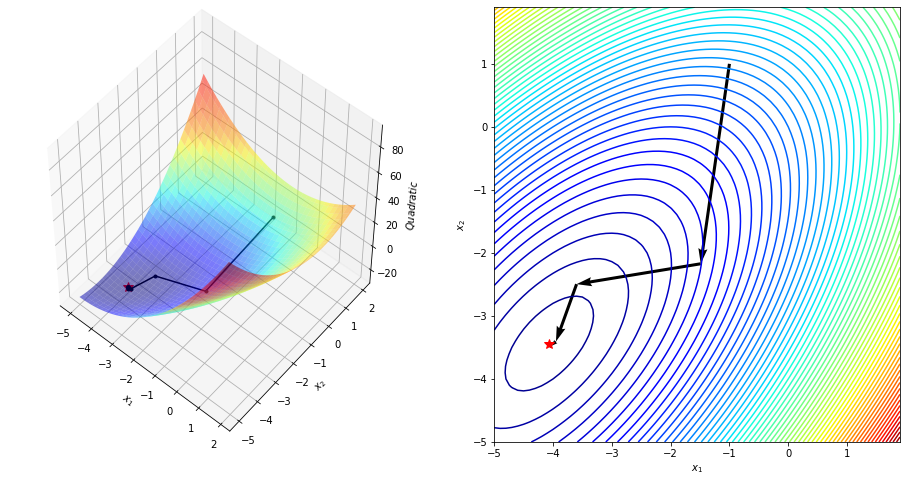

In [17]:
opt = HeavyBallGradient(f=quad, x=[-1, 1], verbose=5)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00			 1	 1	2.00e-02
  10	  25	3.3399e-03	3.6448e-01	3.3399e-03	8.3498e-04	 1	 1	3.30e-02
  20	  42	2.3519e-06	1.9096e-03	2.3519e-06	7.0419e-04	 1	 1	1.04e-01
  30	  62	1.0240e-06	1.2355e-03	1.0240e-06	4.3538e-01	 1	 1	1.07e-01
  40	  82	4.4557e-07	8.0780e-04	4.4557e-07	4.3513e-01	 1	 1	1.09e-01
  50	 102	1.9354e-07	5.2928e-04	1.9354e-07	4.3436e-01	 1	 1	1.11e-01
  60	 122	8.3941e-08	3.4723e-04	8.3941e-08	4.3372e-01	 1	 1	1.12e-01
  70	 142	3.6367e-08	2.2797e-04	3.6367e-08	4.3324e-01	 1	 1	1.12e-01
  80	 162	1.5744e-08	1.4974e-04	1.5744e-08	4.3291e-01	 1	 1	1.13e-01
  90	 182	6.8118e-09	9.8391e-05	6.8118e-09	4.3267e-01	 1	 1	1.13e-01
 100	 202	2.9462e-09	6.4661e-05	2.9462e-09	4.3252e-01	 1	 1	1.13e-01
 110	 222	1.2740e-09	4.2499e-05	1.2740e-09	4.3241e-01	 1	 1	1.13e-01
 120	 242	5.5079e-10	2.7935e-05	5.5079e-10	4.3234e-01	 1	 1	1.14e-01
 130	 262	2.3810e-10	1.8363e-05	2.3810e-10	4.3229e-01	 1	 1	1.14e

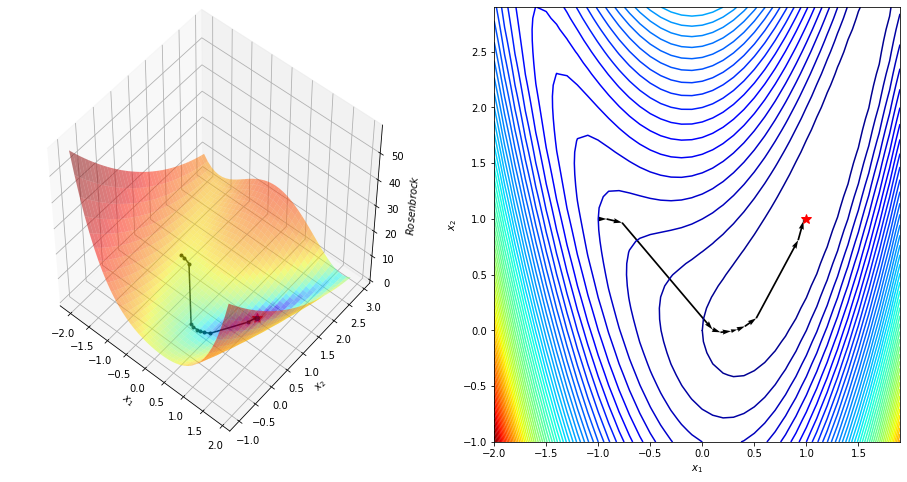

In [18]:
opt = HeavyBallGradient(f=rosen, x=[-1, 1], verbose=10)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

## More than Gradient or 2nd Order Methods

### Newton

iter	feval	cost		gnorm		gap		rate		delta		ls	it	astar
   0	   1	3.0000e+00	1.3153e+01	3.1906e+01			0.0000e+00	 1	 0	1.0000e+00
   1	   2	-2.8906e+01	0.0000e+00	-3.5527e-15	-1.1135e-16



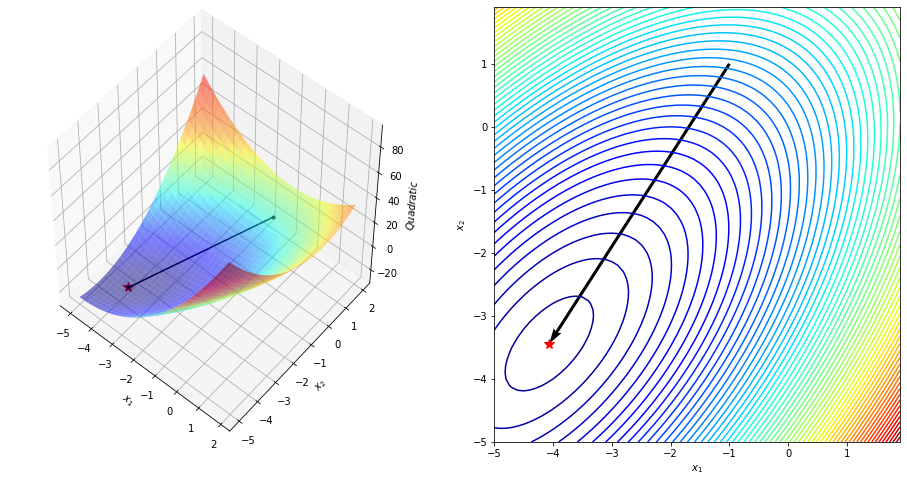

In [19]:
opt = Newton(f=quad, x=[-1, 1], verbose=True)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		delta		ls	it	astar
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00			0.0000e+00	 1	 2	1.1094e-01
   1	   4	3.1666e+00	3.8677e+00	3.1666e+00	7.9164e-01	0.0000e+00	 1	 1	1.2322e-01
   2	   6	2.5560e+00	3.5683e+00	2.5560e+00	8.0718e-01	0.0000e+00	 1	 1	1.9290e-01
   3	   8	1.8760e+00	3.0925e+00	1.8760e+00	7.3397e-01	0.0000e+00	 1	 1	3.5560e-01
   4	  10	1.1297e+00	2.2308e+00	1.1297e+00	6.0215e-01	0.0000e+00	 1	 0	1.0000e+00
   5	  11	4.3941e-01	1.5815e+00	4.3941e-01	3.8897e-01	0.0000e+00	 1	 0	1.0000e+00
   6	  12	6.7464e-02	3.4182e-01	6.7464e-02	1.5353e-01	0.0000e+00	 1	 0	1.0000e+00
   7	  13	6.0875e-03	3.9380e-01	6.0875e-03	9.0232e-02	0.0000e+00	 1	 0	1.0000e+00
   8	  14	2.6022e-05	5.7622e-03	2.6022e-05	4.2746e-03	0.0000e+00	 1	 0	1.0000e+00
   9	  15	1.4146e-09	2.0356e-04	1.4146e-09	5.4363e-05	0.0000e+00	 1	 0	1.0000e+00
  10	  16	1.5460e-18	1.3971e-09	1.5460e-18	1.0929e-09



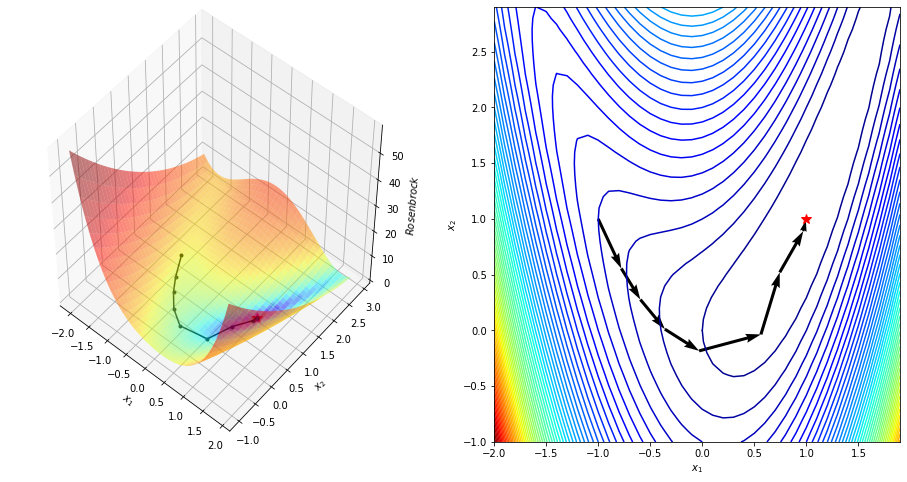

In [20]:
opt = Newton(f=rosen, x=[-1, 1], verbose=True)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)

### BFGS

iter	feval	cost		gnorm		gap		rate		ls	it	astar		rho
   0	   1	1.7000e+01	1.3892e+01	4.5906e+01			 1	 1	4.1866e-01	1.2376e-02
   1	   3	-2.3400e+01	8.5886e+00	5.5060e+00	1.1994e-01	 1	 1	1.4929e-01	9.0809e-02
   2	   5	-2.8906e+01	0.0000e+00	-3.5527e-15	-6.4524e-16



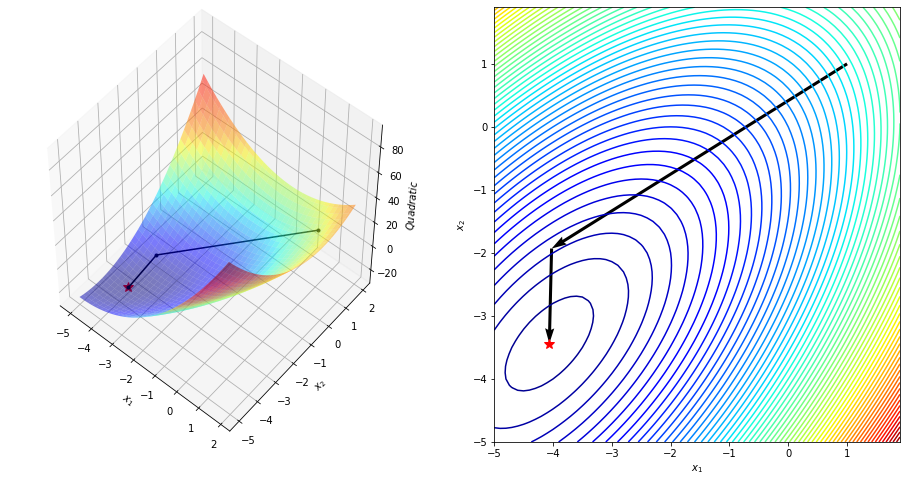

In [21]:
opt = BFGS(f=quad, x=[1, 1], verbose=True)
opt.minimize()
plot_trajectory_optimization(quad, opt, x_min=-5, x_max=2, y_min=-5, y_max=2)

iter	feval	cost		gnorm		gap		rate		ls	it	astar		rho
   0	   1	4.0000e+00	4.0000e+00	4.0000e+00			 1	 1	2.0000e-02	9.6862e+00
   1	   3	3.7336e+00	2.7783e+00	3.7336e+00	9.3340e-01	 1	 1	3.8616e-01	3.1745e+00
   2	   5	2.2653e+00	2.9717e+00	2.2653e+00	6.0673e-01	 1	 2	5.7832e-02	1.8723e+01
   3	   8	1.9327e+00	2.9884e+00	1.9327e+00	8.5317e-01	 1	 1	2.1912e-01	6.0276e+00
   4	  10	1.4771e+00	2.7396e+00	1.4771e+00	7.6429e-01	 1	 1	4.4112e-01	3.0697e+00
   5	  12	1.0980e+00	2.1668e+00	1.0980e+00	7.4335e-01	 1	 0	1.0000e+00	3.4975e+00
   6	  13	7.7830e-01	1.5901e+00	7.7830e-01	7.0883e-01	 1	 0	1.0000e+00	3.5447e+00
   7	  14	3.4279e-01	8.4908e-01	3.4279e-01	4.4044e-01	 1	 0	1.0000e+00	5.2482e+00
   8	  15	1.0901e-01	3.7674e-01	1.0901e-01	3.1800e-01	 1	 0	1.0000e+00	7.4794e+00
   9	  16	3.6826e-02	7.7169e-01	3.6826e-02	3.3783e-01	 1	 0	1.0000e+00	9.3834e+00
  10	  17	5.5777e-03	4.4680e-01	5.5777e-03	1.5146e-01	 1	 0	1.0000e+00	8.0564e+01
  11	  18	4.2976e-05	4.0221e-02	4.2976e-05	7.7050e-03	 

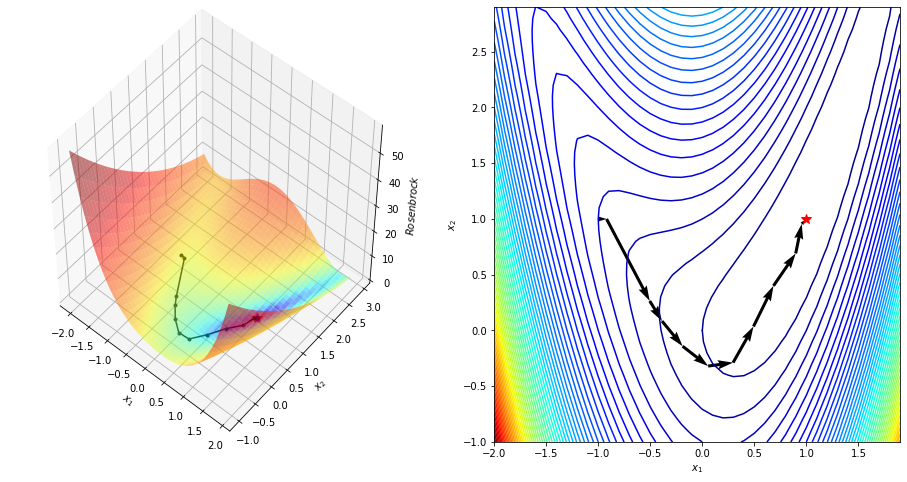

In [22]:
opt = BFGS(f=rosen, x=[-1, 1], verbose=True)
opt.minimize()
plot_trajectory_optimization(rosen, opt, x_min=-2, x_max=2, y_min=-1, y_max=3)